# **Handwritten Digits Classification**

## Importing the relevant libraries 

In [1]:
import tensorflow as ts
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

## Load data set

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

## Preprocessing

In [3]:
print ( "X train size :",len(X_train))
print ( "X test size :",len(X_test))

X train size : 60000
X test size : 10000


In [4]:
X_train[0].shape

(28, 28)

5


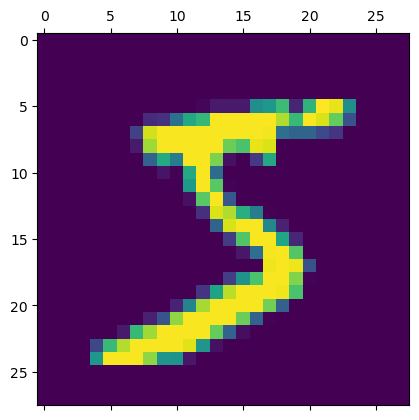

In [5]:
plt.matshow(X_train[0])
print(y_train[0])

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

## The model without hiddden layer

In [9]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4647 - accuracy: 0.8789
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3032 - accuracy: 0.9166
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.9244
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9257


In [10]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2664 - accuracy: 0.9254


[0.26641178131103516, 0.9254000186920166]

In [11]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 1s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

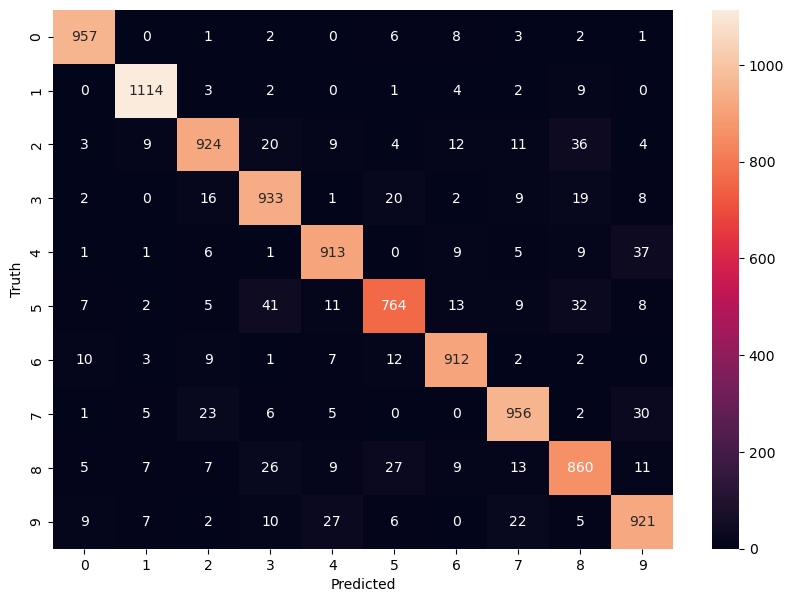

In [13]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = ts.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## The model without hiddden layer

In [16]:
model = keras.Sequential([
    
    keras.layers.Dense(150, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2476 - accuracy: 0.9296
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1055 - accuracy: 0.9692
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0718 - accuracy: 0.9785
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0525 - accuracy: 0.9839
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0400 - accuracy: 0.9879


In [17]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0749 - accuracy: 0.9779


[0.07494814693927765, 0.9779000282287598]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

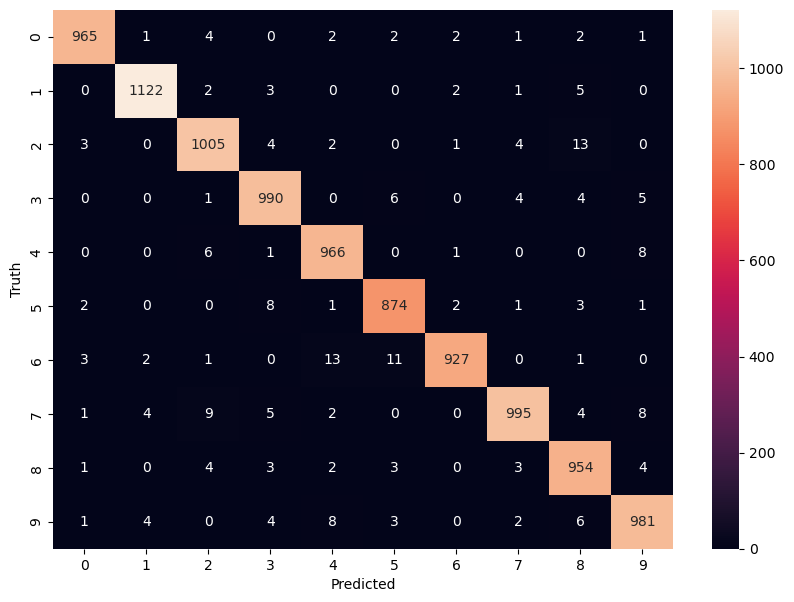

In [18]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = ts.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## The model with hiddden layer and flatten the matrix 

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2513 - accuracy: 0.9287
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1079 - accuracy: 0.9683
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0723 - accuracy: 0.9778
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0531 - accuracy: 0.9837
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0406 - accuracy: 0.9874


In [21]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0741 - accuracy: 0.9781


[0.074075847864151, 0.9781000018119812]